# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
%config Completer.use_jedi = False

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

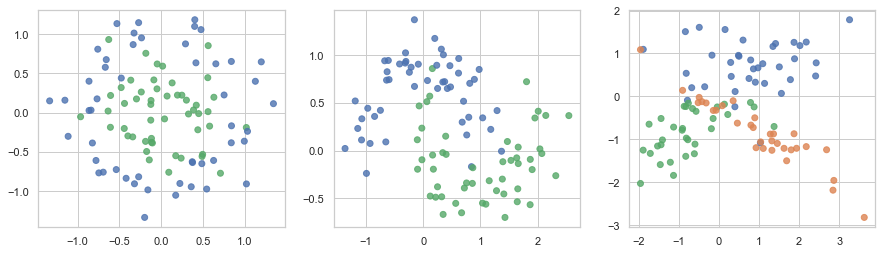

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

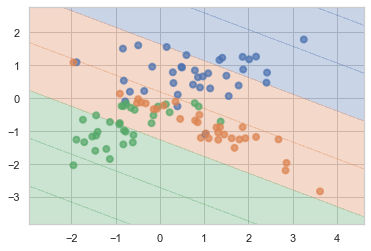

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [8]:
from sklearn.metrics import accuracy_score

#### Dataset #1:

Train accuracy: 1.0
Test accuracy: 0.7


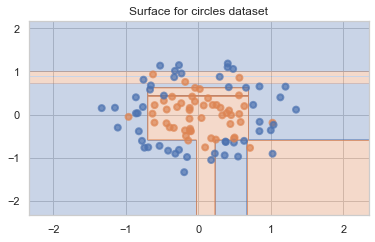

In [9]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(f'Train accuracy:', accuracy_score(y_train, y_train_pred))
print(f'Test accuracy:', accuracy_score(y_test, y_test_pred))

plt.title('Surface for circles dataset')
plot_surface(dt, X, y)

#### Dataset #2:

Train accuracy: 1.0
Test accuracy: 0.8666666666666667


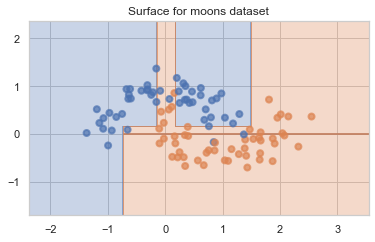

In [10]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(f'Train accuracy:', accuracy_score(y_train, y_train_pred))
print(f'Test accuracy:', accuracy_score(y_test, y_test_pred))

plt.title('Surface for moons dataset')
plot_surface(dt, X, y)

#### Dataset #3:

Train accuracy: 1.0
Test accuracy: 0.8333333333333334


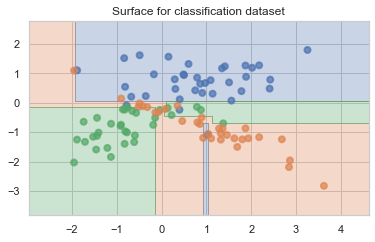

In [11]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(f'Train accuracy:', accuracy_score(y_train, y_train_pred))
print(f'Test accuracy:', accuracy_score(y_test, y_test_pred))

plt.title('Surface for classification dataset')
plot_surface(dt, X, y)

__Ответ:__ Без должной настройки параметров деревья переобучились, это видно как по показателям accuracy для каждого из датасетов, так и по разделяющей поверхности. Получилось, что для каждого датасета accuracy на тренировочной выборке = 1, а на тестовой accuracy получилось ниже примерно на 15 - 25 % (для разных датасетов), а разделяющая поверхность выглядит очень сложной, явная подгонка под выборку. То есть, присутствует сильное переобучение.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

В это задании я использовала код из функции plot_surface и код из семинара №7 для создания функции show_different_params. Качество на обучающей и тестовой выборок для каждого набора параметров я отображаю в легенде к каждому графику.

In [12]:
def show_different_params(dataset):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    plt.figure(figsize=(16, 16))
    for i, max_depth in enumerate([4, 6, 10, 15]):
        for j, min_samples_leaf in enumerate([12, 8, 6, 1]):
            plot_step = 0.01
            palette = sns.color_palette(n_colors=len(np.unique(y)))
            cmap = ListedColormap(palette)
            x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
            y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))

            clf = DecisionTreeClassifier(max_depth=max_depth,
                                         min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            accuracy_train = accuracy_score(y_train, clf.predict(X_train))
            accuracy_test = accuracy_score(y_test, clf.predict(X_test))
        
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

            plt.subplot2grid((4, 4), (i, j))
            plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
                        edgecolor=np.array(palette)[y], linewidths=2)
            plt.title('max_depth=' + str(max_depth) +
                      ' | min_samples_leaf=' + str(min_samples_leaf))
            plt.legend(['Train: ' + str(accuracy_train)[0:4] +
                        ', Test: ' + str(accuracy_test)[0:4]])
    plt.show()
    print('==================================================================================================')

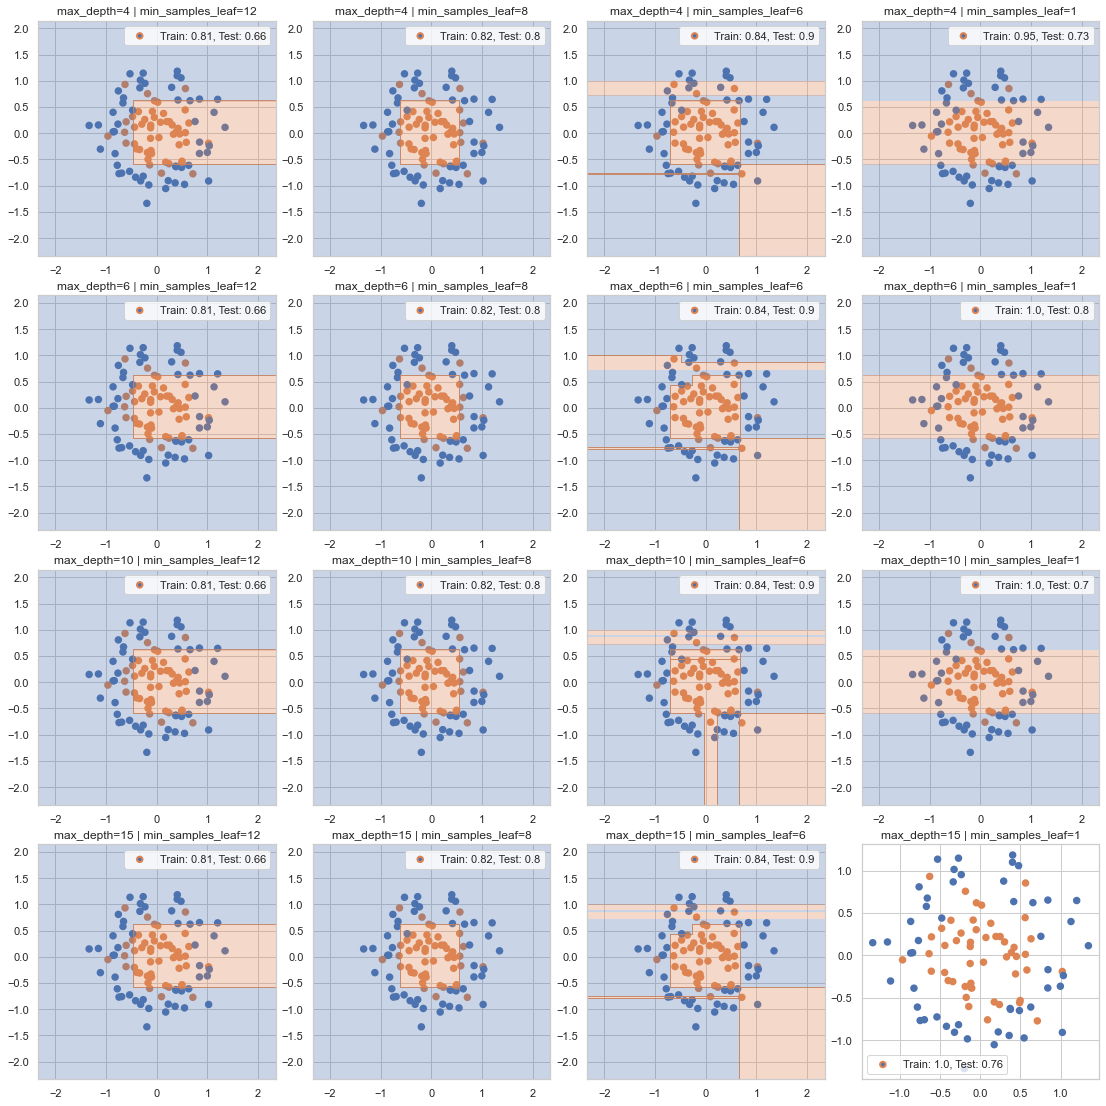

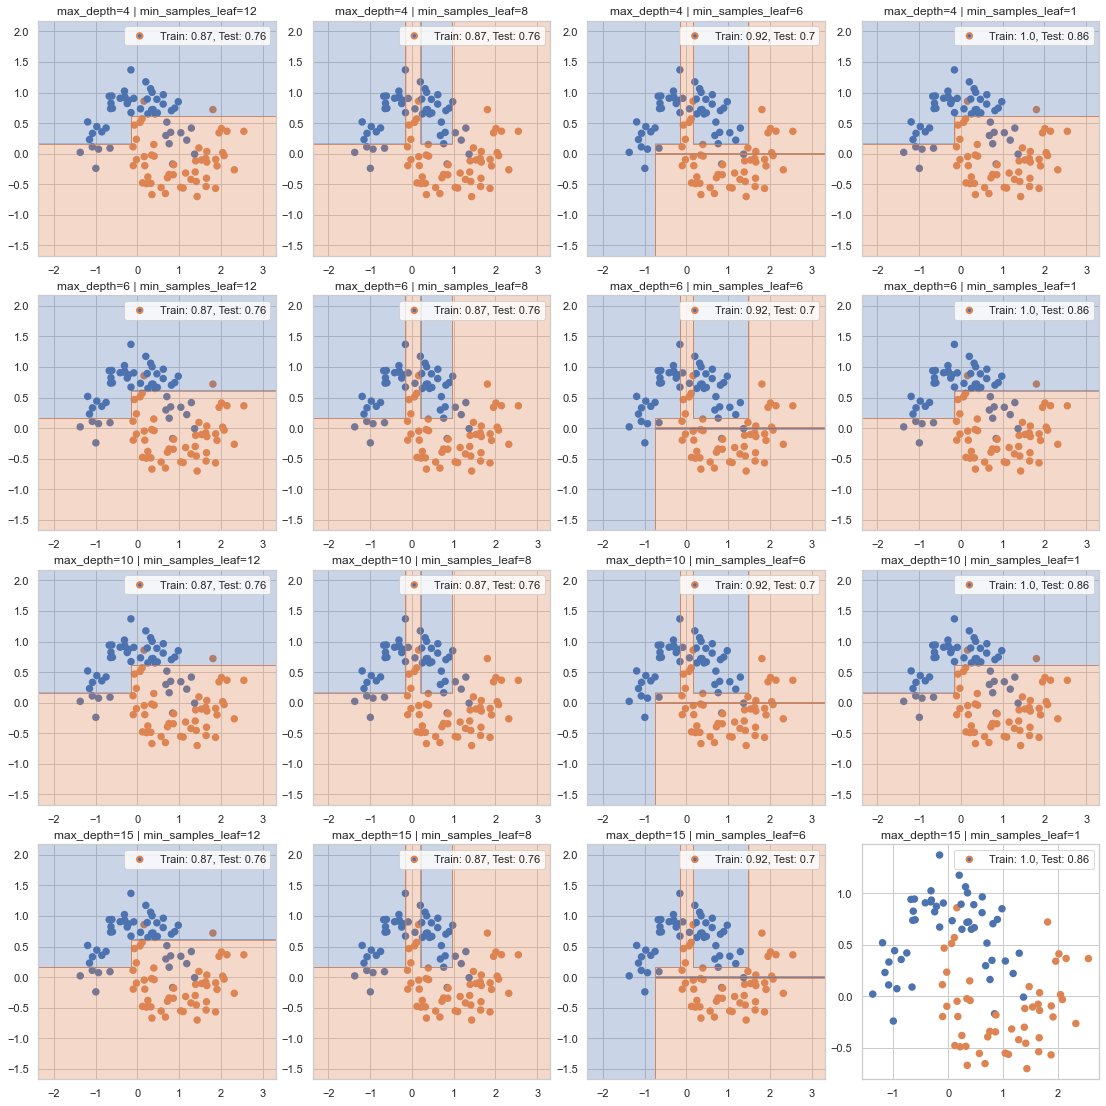

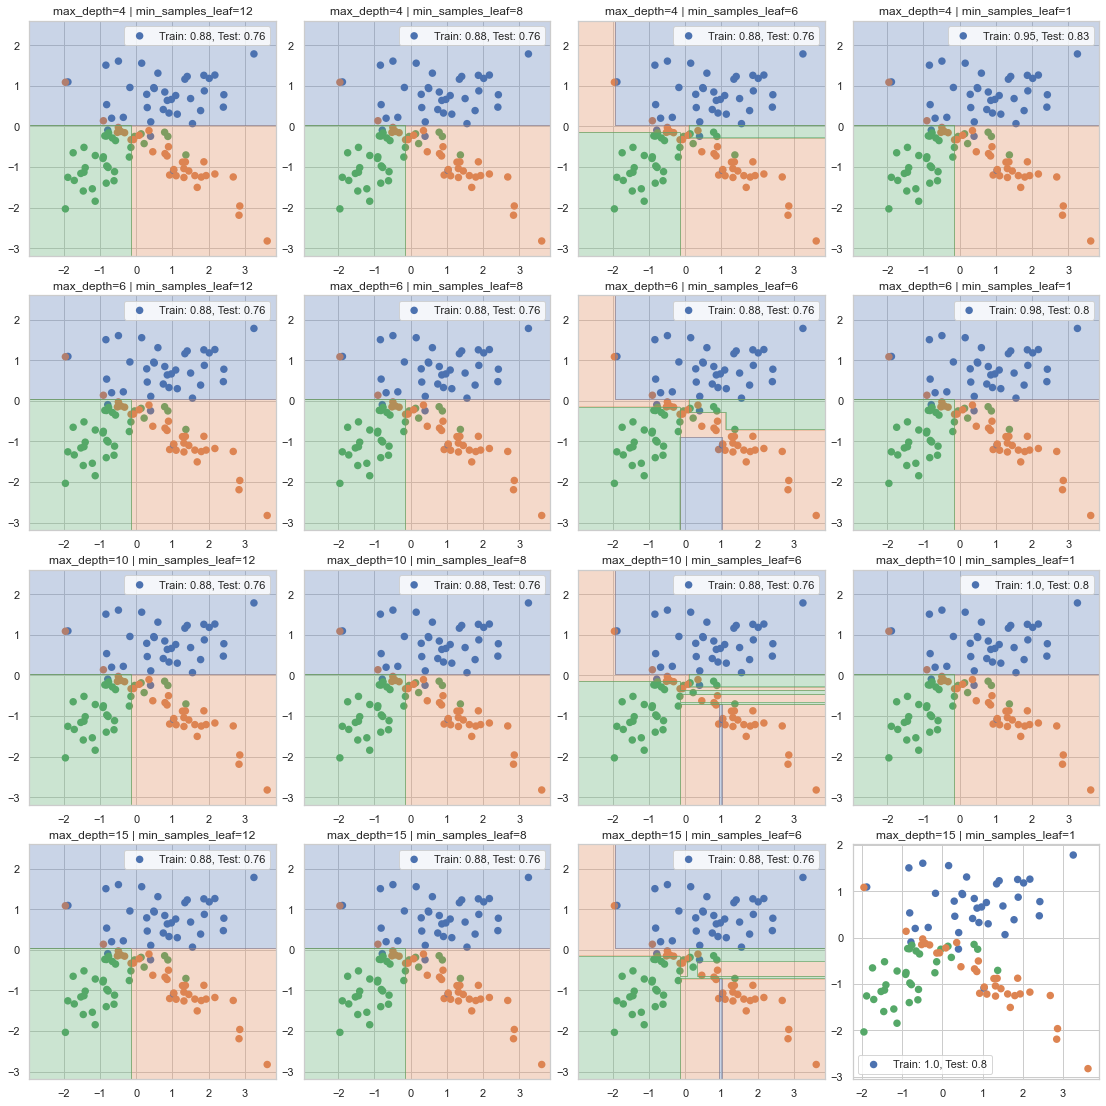

In [13]:
for i in range(3):
    show_different_params(datasets[i])

Я долго пыталась, но так и не смогла понять, по какой причине не рисуется разделяющая поверхность на последних рисунках((

__Ответ:__ при выставлении парметров max_depth слишком маленьким и min_samples_leaf слишком большим дерево модет недообучиться и показывать плохое качество из-за слижком сильных ограничений на сложность модели. При выставлении max_depth слишком большим и min_samples_leaf слишком маленьким возникает явное переобучение и дерево слишком сильно подгоняется под обучающую выборку, теряя обобщающую способность. При этом для каждого датасета оптимальный набор параметров max_depth и min_samples_leaf различен, так как датасеты имеют кардинально различную структуру.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Ссылка на посылку: https://contest.yandex.ru/contest/31332/run-report/59222813/

Ник в контесте: Polina Cherepanova

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
data = pd.read_csv('students.csv')

X = data.drop(' UNS', axis=1)
y = data[' UNS']
X.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [15]:
from hw5code import find_best_split

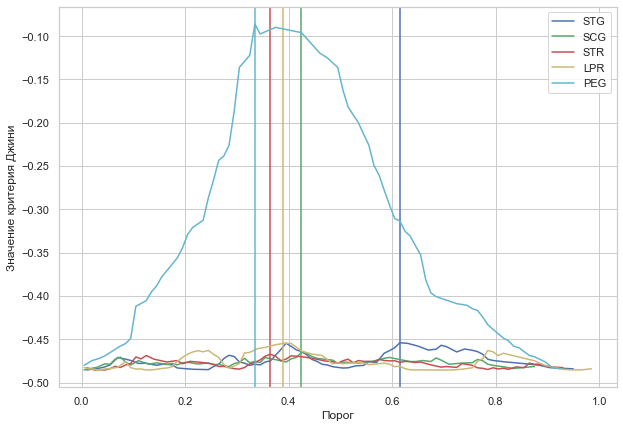

In [16]:
plt.figure(figsize = (10, 7))

colors = ['b', 'g', 'r', 'y', 'c']
for feature, color in zip(X.columns, colors):
    thresholds, ginis, threshold_best, gini_best = find_best_split(
        X[feature].to_numpy(), y.to_numpy()
    )
    plt.plot(thresholds, ginis, label=feature, color=color)
    plt.axvline(threshold_best, color=color, label=None)

plt.ylabel("Значение критерия Джини")
plt.xlabel("Порог")
plt.legend()
plt.show()

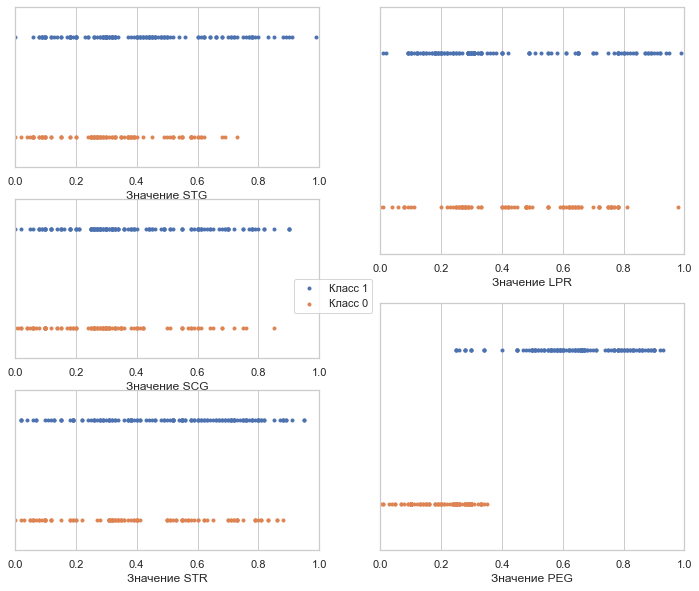

In [17]:
fig = plt.figure(figsize=(12,10))
ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 3)
ax_3 = fig.add_subplot(3, 2, 5)
ax_4 = fig.add_subplot(2, 2, 2)
ax_5 = fig.add_subplot(2, 2, 4)

axes = [ax_1, ax_2, ax_3, ax_4, ax_5]
features = ["STG", "SCG", "STR", "LPR", "PEG"]

target_mask = (y == 1)
for i, feature in enumerate(features):
    axes[i].scatter(x=X.loc[target_mask, feature], y=y[target_mask], s=9)
    axes[i].scatter(x=X.loc[~target_mask, feature], y=y[~target_mask], s=9)
    axes[i].set_ylim(-0.3, 1.3)
    axes[i].set_xlim(0, 1)
    axes[i].set_yticks([])
    axes[i].set_xlabel('Значение ' + feature)

plt.figlegend(['Класс 1', 'Класс 0'], loc=(0.42, 0.47))

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По первому графику очевидно, что выполнять деление выборки на левое и правое поддеревья необходимо по признаку 'PEG' с порогом указанным на графике.

По scatter-графикам видно, что выборка почти идеально разделима как раз по признаку 'PEG, тогда как остальные признаки нельзя хорошо разделить на две части.

Кривая для 'хорошего' признака должна сначала возрастать, потом убывать, то есть иметь ярко выраженный максимум, по которому и будет разбиваться выборка. Признаки, по которым выборка не может быть хорошо разделена имеют графики, похожие на константу.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Ссылка на успешную посылку: https://contest.yandex.ru/contest/31332/run-report/59250707/

Ник в контесте: Polina Cherepanova

In [18]:
from hw5code import DecisionTree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
dt = DecisionTree(['categorical'] * 5)
dt.fit(X_train.values, y_train.values)
pred_train = dt.predict(X_train.values)
pred_test = dt.predict(X_train.values)

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [21]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

In [22]:
data = pd.read_csv('agaricus-lepiota.data')
X = data.drop('p', axis=1)
y = data['p']
X.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


In [23]:
X.shape

(8123, 22)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

x_encoder = OrdinalEncoder()
X_train = x_encoder.fit_transform(X_train)
X_test = x_encoder.transform(X_test)

y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_test = y_encoder.transform(y_test)

Буду считать все признаки категориальными

In [25]:
dt = DecisionTree(['categorical'] * X.shape[1])
dt.fit(X_train, y_train)
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

In [26]:
print(f'Train accuracy: %.4f' % accuracy_score(pred_train, y_train))
print(f'Test accuracy: %.4f' % accuracy_score(pred_test, y_test))

Train accuracy: 1.0000
Test accuracy: 1.0000


Получаю, что дерево идельно решило эту задачу, как и должно было быть судя по заданию.
Посмотрю, какая глубина у дерева:

In [27]:
dt._tree

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [0.0, 3.0, 5.0],
 'left_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': [2.0, 3.0, 4.0, 1.0, 0.0, 8.0, 6.0, 7.0],
  'left_child': {'type': 'nonterminal',
   'feature_split': 14,
   'categories_split': [6.0, 5.0, 2.0, 3.0, 7.0, 4.0],
   'left_child': {'type': 'nonterminal',
    'feature_split': 1,
    'categories_split': [2.0, 0.0, 3.0],
    'left_child': {'type': 'nonterminal',
     'feature_split': 0,
     'categories_split': [4.0, 5.0, 2.0, 0.0, 3.0],
     'left_child': {'type': 'nonterminal',
      'feature_split': 14,
      'categories_split': [6.0, 5.0, 2.0, 3.0, 7.0],
      'left_child': {'type': 'nonterminal',
       'feature_split': 21,
       'categories_split': [6.0, 0.0, 3.0, 1.0, 4.0, 5.0],
       'left_child': {'type': 'terminal', 'class': 0},
       'right_child': {'type': 'nonterminal',
        'feature_split': 1,
        'categories_split': [2.0],
        'left_child': {'type'

И дерево не очень глубокое, значит всё хорошо.

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

### 1) mushrooms:

Загружаю и обрабатываю данные:

In [29]:
data = pd.read_csv('agaricus-lepiota.data')

In [30]:
for col in data.columns:
    print(data[col].unique())

['e' 'p']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['b' 'n']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['c' 'e' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['n' 's' 'a' 'v' 'y' 'c']
['g' 'm' 'u' 'd' 'p' 'w' 'l']


In [31]:
X = data.drop('p', axis=1)
y = data['p']

X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

mushrooms = []

In [32]:
len(y)

8123

In [33]:
y.sum()

3915

#### 1.1) DecisionTree, считающий все признаки вещественными:

In [34]:
dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
mushrooms.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.99926


#### 1.2) DecisionTree, считающий все признаки категориальными:

In [35]:
dt = DecisionTree(['categorical'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
mushrooms.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 1.00000


#### 1.3) DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков:

In [36]:
ohe = OneHotEncoder(sparse=False)
X_ohe = ohe.fit_transform(X)

dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X_ohe, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
mushrooms.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: nan


#### 1.4) DecisionTreeClassifier из sklearn:

In [37]:
dt = DecisionTreeClassifier()
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
mushrooms.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.99926


In [38]:
mushrooms

[0.9992610837438424, 1.0, nan, 0.9992610837438424]

### 2) tic-tac-toe:

Загружаю и обрабатываю данные:

In [39]:
data = pd.read_csv('tic-tac-toe.data')
data.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [40]:
for col in data.columns:
    print(data[col].unique())

['x' 'o' 'b']
['x' 'o' 'b']
['x' 'o' 'b']
['x' 'o' 'b']
['o' 'b' 'x']
['o' 'b' 'x']
['o' 'b' 'x']
['x' 'o' 'b']
['o' 'x' 'b']
['positive' 'negative']


In [41]:
X = data.drop('positive', axis=1)
y = data['positive']

X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

tic_tac_toe = []

In [42]:
len(y)

957

In [43]:
y.sum()

625

#### 2.1) DecisionTree, считающий все признаки вещественными:

In [44]:
dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
tic_tac_toe.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.46270


#### 2.2) DecisionTree, считающий все признаки категориальными:

In [45]:
dt = DecisionTree(['categorical'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
tic_tac_toe.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.54927


#### 2.3) DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков:

In [46]:
ohe = OneHotEncoder(sparse=False)
X_ohe = ohe.fit_transform(X)

dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X_ohe, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
tic_tac_toe.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: nan


#### 2.4) DecisionTreeClassifier из sklearn:

In [47]:
dt = DecisionTreeClassifier()
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
tic_tac_toe.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.48361


In [48]:
tic_tac_toe

[0.4626973684210527, 0.549265350877193, nan, 0.48360745614035094]

### 3) cars:

Загружаю и обрабатываю данные:

In [49]:
data = pd.read_csv('car.data')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [50]:
for col in data.columns:
    print(data[col].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


In [51]:
X = data.drop('unacc', axis=1)
y = data['unacc']

X = OrdinalEncoder().fit_transform(X)

mask = (y == 'good') + (y == 'vgood')
y = np.zeros(y.shape[0])
y[mask] = 1

cars = []

In [52]:
len(y)

1727

In [53]:
y.sum()

134.0

#### 3.1) DecisionTree, считающий все признаки вещественными:

In [54]:
dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
cars.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.94260


#### 3.2) DecisionTree, считающий все признаки категориальными:

In [55]:
dt = DecisionTree(['categorical'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
cars.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.96752


#### 3.3) DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков:

In [56]:
ohe = OneHotEncoder(sparse=False)
X_ohe = ohe.fit_transform(X)

dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X_ohe, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
cars.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: nan


#### 3.4) DecisionTreeClassifier из sklearn:

In [57]:
dt = DecisionTreeClassifier()
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
cars.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.93969


In [58]:
cars

[0.9425998118026616, 0.9675191558005108, nan, 0.9396928350584755]

### 4) nursery:

Загружаю и обрабатываю данные:

In [59]:
data = pd.read_csv('nursery.data')
data.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [60]:
for col in data.columns:
    print(data[col].unique())

['usual' 'pretentious' 'great_pret']
['proper' 'less_proper' 'improper' 'critical' 'very_crit']
['complete' 'completed' 'incomplete' 'foster']
['1' '2' '3' 'more']
['convenient' 'less_conv' 'critical']
['convenient' 'inconv']
['nonprob' 'slightly_prob' 'problematic']
['priority' 'not_recom' 'recommended']
['priority' 'not_recom' 'recommend' 'very_recom' 'spec_prior']


In [61]:
X = data.drop('recommend', axis=1)
y = data['recommend']

X = OrdinalEncoder().fit_transform(X)

mask = (y == 'very_recom') + (y == 'priority') + (y == 'spec_prior')
y = np.zeros(y.shape[0])
y[mask] = 1

nursery = []

In [62]:
len(y)

12959

In [63]:
y.sum()

8638.0

#### 4.1) DecisionTree, считающий все признаки вещественными:

In [64]:
dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
nursery.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.99985


#### 4.2) DecisionTree, считающий все признаки категориальными:

In [65]:
dt = DecisionTree(['categorical'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
nursery.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.99992


#### 4.3) DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков:

In [66]:
ohe = OneHotEncoder(sparse=False)
X_ohe = ohe.fit_transform(X)

dt = DecisionTree(['real'] * X.shape[1])
accuracy = np.mean(
    cross_val_score(dt, X=X_ohe, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
nursery.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: nan


#### 4.4) DecisionTreeClassifier из sklearn:

In [67]:
dt = DecisionTreeClassifier()
accuracy = np.mean(
    cross_val_score(dt, X=X, y=y,
                    cv=KFold(n_splits=10),
                    scoring=make_scorer(accuracy_score))
)
nursery.append(accuracy)
print(f'Accuracy со всеми категориальными признаками: %.5f' % accuracy)

Accuracy со всеми категориальными признаками: 0.99985


In [68]:
nursery

[0.9998456790123458, 0.9999228395061728, nan, 0.9998456790123458]

### Результаты:

In [69]:
df = pd.DataFrame(columns=['Dataset', 'All real', 'All categorical', 'All real + ohe', 'From sklearn'])

In [70]:
m = ['mushrooms']
m.extend(mushrooms)
df.loc[len(df)] = m

t = ['tic_tac_toe']
t.extend(tic_tac_toe)
df.loc[len(df)] = t

c = ['cars']
c.extend(cars)
df.loc[len(df)] = c

n = ['nursery']
n.extend(nursery)
df.loc[len(df)] = n

In [71]:
df

,Dataset,All real,All categorical,All real + ohe,From sklearn
0,mushrooms,0.999261,1.000000,NaN,0.999261
1,tic_tac_toe,0.462697,0.549265,NaN,0.483607
2,cars,0.942600,0.967519,NaN,0.939693
3,nursery,0.999846,0.999923,NaN,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Во всех рассмотренных наборах данных, все признаки были категориальными и для всех наборов лучший результат был получен при использовании 'DecisionTree, считающий все признаки категориальными'. Кроме лучшего результата алгоритмы ранжировались по-разному в зависимости от датасета.

Думаю, что результаты, показанные на различных датасетах напрямую зависят от сложности данных, например, для датасета mushrooms (так же как и для cars и nursery), такая модель как дерево очень хорошо подходят и показывает практически идеальный результат. В то время как на датасете tic_tac_toe качество не очень хорошее, при чём, так как решается задача бинарной классификации, то результат похож на случайное угадывание, поэтому можно сказать, что ни один из опробованных алгоритмов не подошлё для решения данной задачи. С другой стороны, подбор хороших гиперпараметров не производился, поэтому нельзя точно сказать о том, подходят ли деревья для данной задачи. Возможно, при должном подборе гиперпараметров можно достичь лучшего качества, чем получилось.

Случайность в представленных результах сведена к минимуму, так как не было разделения на обучающую и тестовую выборки, а качество оценивалось с помощью кроссвалидации, при этом по заданию было использовано 10 блоков в кроссвалидации, то есть обучение производилось всегда на большой доли данных. В построении дерева жадным алгоритмом так же нет случайности так как на каждом шаге выбирается лучший порог с точки зрения критерия Джини.

В датасете tic_tac_toe очень мало признаков, возможно поэтому дерево показывает такой плохой результат на данной задаче. В то же вермя в остальных трёх наборах данных есть гораздо больше признаков и все признаки имеют большее резнообразие значений.

Так же хочется добавить, что не все датасеты имеют сбалансированные классы, так, например в датасете tic_tac_toe 2/3 объектов имеют ответ 1, то есть присутствует дисбаланс классов и метрика accuracy может не очень хорошо отражать качетво полученных моделей. В датасете nursery присутствует примерно такой же дисбаланс.

Вставьте что угодно, описывающее ваши впечатления от этого задания: